In [1]:
# CNN --
# required Librearies --
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# fashion_mnist = tf.keras.datasets.fashion_mnist
fashion_mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

fashion_mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<module 'keras.datasets.mnist' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/mnist/__init__.py'>

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,validation_split=0.1,batch_size = 6)

Epoch 1/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 80s 9ms/step - accuracy: 0.8852 - loss: 0.3490 - val_accuracy: 0.9845 - val_loss: 0.0518
Epoch 2/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 73s 8ms/step - accuracy: 0.9792 - loss: 0.0674 - val_accuracy: 0.9853 - val_loss: 0.0469
Epoch 3/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 74s 8ms/step - accuracy: 0.9842 - loss: 0.0504 - val_accuracy: 0.9873 - val_loss: 0.0463
Epoch 4/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 74s 8ms/step - accuracy: 0.9881 - loss: 0.0373 - val_accuracy: 0.9853 - val_loss: 0.0534
Epoch 5/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 80s 8ms/step - accuracy: 0.9904 - loss: 0.0312 - val_accuracy: 0.9830 - val_loss: 0.0556
Epoch 6/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 74s 8ms/step - accuracy: 0.9909 - loss: 0.0287 - val_accuracy: 0.9833 - val_loss: 0.0741
Epoch 7/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 74s 8ms/step - accuracy: 0.9922 - loss: 0.0241 - val_accuracy: 0.9883 - val_loss: 0.0443
Epoch 8/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 73s 8ms/step - accuracy: 0.9934 - loss: 0

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test,verbose = 2)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 - 2s - 8ms/step - accuracy: 0.9842 - loss: 0.0778
Test Accuracy: 0.9842


In [8]:
import numpy as np
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = y_test[:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [9]:
print("Predicted labels:", predicted_labels)
print("True labels:", true_labels)

Predicted labels: [7 2 1 0 4 1 4 9 6 9]
True labels: [7 2 1 0 4 1 4 9 5 9]


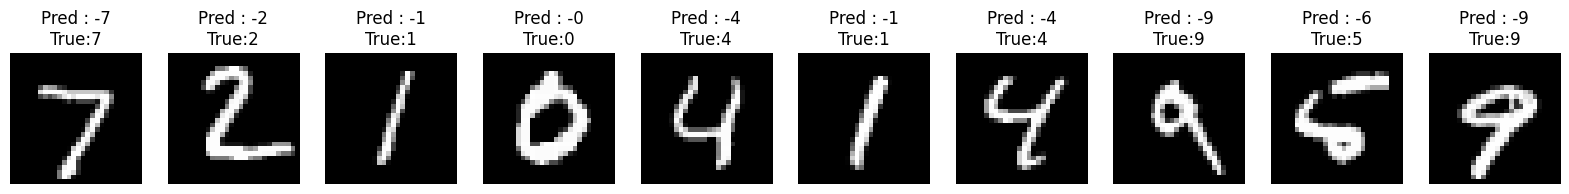

In [10]:
# class_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_name = ["0","1","2","3","4","5","6","7","8","9"]
plt.figure(figsize=(20,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap = "gray")
    plt.title(f"Pred : -{class_name[predicted_labels[i]]}\nTrue:{class_name[true_labels[i]]}")
    plt.axis("off")
plt.show()

In [11]:
from IPython.display import display
from PIL import Image
import ipywidgets as widgets
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

FileUpload(value={}, accept='image/*', description='Pick Image')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


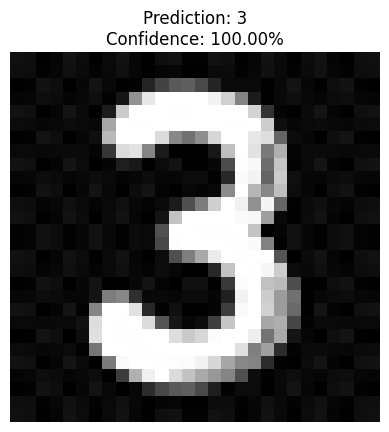

In [12]:
upload = widgets.FileUpload(
    description ="Pick Image",
    accept = "image/*",
    multiple = False
)

def upload_image(change):
    # The actual file content is in upload.value, not change['new']
    # Since multiple=False, we expect only one file
    uploaded_file_name = list(upload.value.keys())[0]
    content = upload.value[uploaded_file_name]['content']

    # convert to PIL image
    image = Image.open(BytesIO(content))
    # convert to grayscale
    image = image.convert("L")
    # resize
    image = image.resize((28,28))

    image_array = np.array(image)/255.0

    # Invert colors as Fashion MNIST images are usually white on black
    image_array = 1 - image_array

    model_input = image_array.reshape(1,28,28,1)

    # model prediction
    predictions = model.predict(model_input)
    predicted_label = np.argmax(predictions)
    confidence = np.max(predictions)

    # Display  -
    plt.imshow(image_array,cmap= "gray")
    plt.title(f"Prediction: {class_name[predicted_label]}\nConfidence: {confidence:.2%}")
    plt.axis("off")
    plt.show()
upload.observe(upload_image, names='value') # Observe 'value' trait for file uploads

display(upload)